In [17]:
import scipy
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import SVHN
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [14]:
torchvision.datasets.SVHN("/home/jupyter/pytorch_datasets/train", split = "train", download = True)
torchvision.datasets.SVHN("/home/jupyter/pytorch_datasets/test", split = "test", download = True)
torchvision.datasets.SVHN("/home/jupyter/pytorch_datasets/extra", split = "extra", download = True)

Dataset SVHN
    Number of datapoints: 531131
    Root location: /home/jupyter/pytorch_datasets/extra
    Split: extra

In [22]:
train_set = torchvision.datasets.SVHN("/home/jupyter/pytorch_datasets/train", split = "train", download = False, transform = ToTensor(), target_transform = None)
validation_set = torchvision.datasets.SVHN("/home/jupyter/pytorch_datasets/test", split = "test", download = False, transform = ToTensor(), target_transform = None)
extra_set = torchvision.datasets.SVHN("/home/jupyter/pytorch_datasets/extra", split = "extra", download = False, transform = ToTensor(), target_transform = None)

In [23]:
train_set

Dataset SVHN
    Number of datapoints: 73257
    Root location: /home/jupyter/pytorch_datasets/train
    Split: train
    StandardTransform
Transform: ToTensor()

In [24]:
validation_set

Dataset SVHN
    Number of datapoints: 26032
    Root location: /home/jupyter/pytorch_datasets/test
    Split: test
    StandardTransform
Transform: ToTensor()

In [25]:
extra_set

Dataset SVHN
    Number of datapoints: 531131
    Root location: /home/jupyter/pytorch_datasets/extra
    Split: extra
    StandardTransform
Transform: ToTensor()

In [28]:
train_set = torch.utils.data.ConcatDataset([train_set, extra_set])

In [29]:
train_set

In [30]:
batch_size = 64

In [32]:
train_loader = DataLoader(train_set, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(validation_set, batch_size, num_workers=4, pin_memory=True)

images.shape: torch.Size([64, 3, 32, 32])


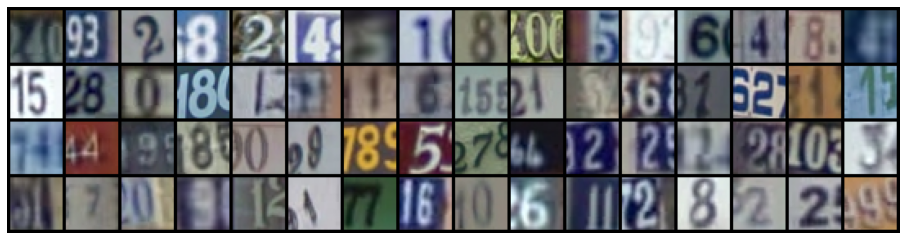

In [33]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break